In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

In [2]:
data = pd.read_csv("./망고플레이트전국댓글.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658251 entries, 0 to 658250
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   리뷰내용    657292 non-null  object
 1   작성자명    657680 non-null  object
 2   후기점수    658251 non-null  object
 3   url     658251 non-null  object
 4   ID      658251 non-null  object
dtypes: object(5)
memory usage: 25.1+ MB


In [6]:
(data.duplicated(['리뷰내용','작성자명']) == False).sum()

93320

In [7]:
# 중복된 값 제거하기
data = data.drop_duplicates(['리뷰내용','작성자명'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93320 entries, 0 to 658250
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   리뷰내용    93180 non-null  object
 1   작성자명    93282 non-null  object
 2   후기점수    93320 non-null  object
 3   url     93320 non-null  object
 4   ID      93320 non-null  object
dtypes: object(5)
memory usage: 4.3+ MB


In [9]:
data['ID'].nunique()

5742

In [12]:
# 이 방법은 시리즈로 나오니까 데이터프레임으로 보고 싶으면
data['ID'].value_counts()

ID
s6C_cdBQX0rj    373
1pmv75vVQx      294
fPi6OZ3r-u      246
y-_XMRSTNrAi    241
gL8RksQTNk      240
               ... 
hrXaBy-1Q3c9      1
orbamYbLUuIw      1
qagtMIp26hNZ      1
OdOMcRj37n2v      1
XGnBYklKwi        1
Name: count, Length: 5742, dtype: int64

In [15]:
# 데이터프레임 형태로 볼 수 있어.
data.groupby('ID')[['리뷰내용']].count()

,리뷰내용
ID,
--IQdCMyShbu,6
--PbUbWkr5xp,2
-0aeDar1Ie,8
-0iuKSUEFRvZ,13
-1LZImufBV8E,3
...,...
zwRLQ9Byr2,6
zxgTXotiK5bQ,1
zxqKlZqoho,4


In [16]:
review_counts = data.groupby('ID')[['리뷰내용']].count()

In [19]:
review_counts.sort_values(by='리뷰내용', ascending=False)

,리뷰내용
ID,
s6C_cdBQX0rj,372
1pmv75vVQx,287
fPi6OZ3r-u,246
y-_XMRSTNrAi,241
gL8RksQTNk,239
...,...
nwykgqfbYx,1
AzIdNOqU_tl3,1
noi8A_NGrRBL,1


In [22]:
review_counts['리뷰내용'] > 20

ID
--IQdCMyShbu    False
--PbUbWkr5xp    False
-0aeDar1Ie      False
-0iuKSUEFRvZ    False
-1LZImufBV8E    False
                ...  
zwRLQ9Byr2      False
zxgTXotiK5bQ    False
zxqKlZqoho      False
zzs7gkIn9R      False
zzulPTWCNorK    False
Name: 리뷰내용, Length: 5742, dtype: bool

In [24]:
review_counts[review_counts['리뷰내용'] > 20]

,리뷰내용
ID,
-1rMxmPWvg,32
-1yzcgbtF5,96
-9jLnAAJZc,25
-D6qxV9cg9mT,23
-EDDtVfafvaS,29
...,...
zYzhPaX003,69
z_sD7nAsh7V0,51
zq9bIKh6PMLV,37


In [25]:
over20reviews = review_counts[review_counts['리뷰내용'] > 20]

In [26]:
over20reviews # ID는 인덱스고, 리뷰내용은 컬럼임.

,리뷰내용
ID,
-1rMxmPWvg,32
-1yzcgbtF5,96
-9jLnAAJZc,25
-D6qxV9cg9mT,23
-EDDtVfafvaS,29
...,...
zYzhPaX003,69
z_sD7nAsh7V0,51
zq9bIKh6PMLV,37


In [28]:
over20reviews.index

Index(['-1rMxmPWvg', '-1yzcgbtF5', '-9jLnAAJZc', '-D6qxV9cg9mT',
       '-EDDtVfafvaS', '-G-YWwpe9D', '-LWflJV1maU2', '-SMNjUsH3i',
       '-SvQDki5HNzQ', '-UUbd93wKH0H',
       ...
       'zNVXE1__XF', 'zOOlz9vfJfFF', 'zSujg5KWKY1W', 'zSxicuDvNH',
       'zWVgSFqWIQrj', 'zYzhPaX003', 'z_sD7nAsh7V0', 'zq9bIKh6PMLV',
       'ztTTr81jaBm7', 'zv1rcsrmRU4S'],
      dtype='object', name='ID', length=1117)

In [29]:
over20reviews_shops = over20reviews.index

In [30]:
#리스트로 들어와있음
over20reviews_shops 

Index(['-1rMxmPWvg', '-1yzcgbtF5', '-9jLnAAJZc', '-D6qxV9cg9mT',
       '-EDDtVfafvaS', '-G-YWwpe9D', '-LWflJV1maU2', '-SMNjUsH3i',
       '-SvQDki5HNzQ', '-UUbd93wKH0H',
       ...
       'zNVXE1__XF', 'zOOlz9vfJfFF', 'zSujg5KWKY1W', 'zSxicuDvNH',
       'zWVgSFqWIQrj', 'zYzhPaX003', 'z_sD7nAsh7V0', 'zq9bIKh6PMLV',
       'ztTTr81jaBm7', 'zv1rcsrmRU4S'],
      dtype='object', name='ID', length=1117)

# 전체 데이터에서 over20reviews_shops 에 해당하는 가게만 필터링해서 새로운 데이터 프레임 만들기

In [31]:
data['ID'] == '-1rMxmPWvg' # True False가 나온다는 건 필터링이 가능하다!

0         False
1         False
2         False
3         False
4         False
          ...  
658246    False
658247    False
658248    False
658249    False
658250    False
Name: ID, Length: 93320, dtype: bool

In [32]:
data[data['ID'] == '-1rMxmPWvg']

,리뷰내용,작성자명,후기점수,url,ID
584281,가자미 물회 처음 먹어보는데 새콤달큰 너무 맛있고 우럭 미역국 짱 부드러워욤뇸,빙구,맛있다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584282,제 기준으로 무조건 망플4점 넘어야하는거 아닌가 싶은 정도로 맛있는 곳입니다. 물회...,LeeZi,맛있다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584283,사천항 가면 꼭 먹는 물회집이에요~ 코로나때문인지 예전만큼 웨이팅이 길진 않은데 맛...,mya,괜찮다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584284,물회 만큼이나 유명한 미역국. 물회 맛집이지만 미역국 맛집 이기도 합니다. 식사하는...,mya,맛있다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584285,미역국 꼭 먹어봐야 한대서 왔습니다. 사실 가자미 물회를 더 맛보고 싶어서 가게 됐...,식품업계종사자,괜찮다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584286,재료 소진시엔 문을 닫는 맛집이라 선택권 없이 가자미 물회만 남아서 가자미 물회 먹...,mya,맛있다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584287,망고플레이트에서 여기가 미역국맛집이라고 해서 다녀왔어요. 회랑 미역국 중에서 뭐먹을...,happynewyear,맛있다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584288,물회를 좋아하는 나에게 딱 스탠다드한 오징어 물회 선사 ㅎㅎ,Yongman,맛있다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584289,우럭미역국이 맛있어요 물회는 맛이 보통인데 가격이 18000원은 비싸네요. 제 입맛...,업사이드,괜찮다,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg
584290,흠 너무 비싸고 평범한 맛..;;; 가자미 물회 한 그릇에 18000원인데 퀄리티에...,진리지안,별로,https://www.mangoplate.com/restaurants/-1rMxmPWvg,-1rMxmPWvg


In [34]:
# 필터링하기
data[data['ID'].apply(lambda x: x in over20reviews_shops)]

,리뷰내용,작성자명,후기점수,url,ID
0,맛있네요,-,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
1,가로수길,전예원,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
2,맛있어요,전예원,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
3,언제와도 맛있는 미라이!!!고등어산도는 무조건 시켜야하구요.. (식빵 뭔지 궁금) ...,스틱스강에맹세하는맛집,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
4,"아와이 야끼소바,사바산도,우니 아마에비 호다테먹었어요.나마비루도 함께^^나마비루 부...",ㅇㅇ,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
...,...,...,...,...,...
657692,나름 맛있고 반찬도 잘나오는 편. 수요미식회에 나왔다는데 그정도로 맛집이라기보다는 ...,쵸미,맛있다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B
657693,바싹불고기에 불맛이 제대로 배어있다.육회는 참기름과 마늘향이 강해 고기맛을 느낄수없...,리핑,괜찮다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B
657694,연탄불고기느낌? ㅋ 서울이랑비슷 더 바싹해지면 좋았을듯.. 만팔천원 식사포함.. 덜 달다,무나&뎅,괜찮다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B
657695,언양에 손님이 왔으면 한번쯤 들르는 언양불고기집. 식당의 규모와 구조를 보면 오래되...,Gastronomy,괜찮다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B


In [35]:
over20df = data[data['ID'].apply(lambda x: x in over20reviews_shops)]

* 리뷰내용 길이가 4 이상인 리뷰만 남김

In [38]:
over20df['리뷰내용'].astype('str')

0                                                      맛있네요
1                                                      가로수길
2                                                      맛있어요
3         언제와도 맛있는 미라이!!!고등어산도는 무조건 시켜야하구요.. (식빵 뭔지 궁금) ...
4         아와이 야끼소바,사바산도,우니 아마에비 호다테먹었어요.나마비루도 함께^^나마비루 부...
                                ...                        
657692    나름 맛있고 반찬도 잘나오는 편. 수요미식회에 나왔다는데 그정도로 맛집이라기보다는 ...
657693    바싹불고기에 불맛이 제대로 배어있다.육회는 참기름과 마늘향이 강해 고기맛을 느낄수없...
657694    연탄불고기느낌? ㅋ 서울이랑비슷 더 바싹해지면 좋았을듯.. 만팔천원 식사포함.. 덜 달다
657695    언양에 손님이 왔으면 한번쯤 들르는 언양불고기집. 식당의 규모와 구조를 보면 오래되...
657696    This is a bulgogi restaurant in an big old hou...
Name: 리뷰내용, Length: 60673, dtype: object

In [39]:
over20df['리뷰내용'] = over20df['리뷰내용'].astype('str')

C:\Users\hi\AppData\Local\Temp\ipykernel_2548\3256979473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over20df['리뷰내용'] = over20df['리뷰내용'].astype('str')


In [40]:
# NaN값을 float으로 처리가 돼서 object of type 'float' has no len() 이런 오류가 뜸.
over20df['리뷰내용'].apply(len) >= 4

0         True
1         True
2         True
3         True
4         True
          ... 
657692    True
657693    True
657694    True
657695    True
657696    True
Name: 리뷰내용, Length: 60673, dtype: bool

In [41]:
over20df[over20df['리뷰내용'].apply(len) >= 4]

,리뷰내용,작성자명,후기점수,url,ID
0,맛있네요,-,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
1,가로수길,전예원,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
2,맛있어요,전예원,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
3,언제와도 맛있는 미라이!!!고등어산도는 무조건 시켜야하구요.. (식빵 뭔지 궁금) ...,스틱스강에맹세하는맛집,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
4,"아와이 야끼소바,사바산도,우니 아마에비 호다테먹었어요.나마비루도 함께^^나마비루 부...",ㅇㅇ,맛있다,https://www.mangoplate.com/restaurants/iMRRP69...,iMRRP69qtkeO
...,...,...,...,...,...
657692,나름 맛있고 반찬도 잘나오는 편. 수요미식회에 나왔다는데 그정도로 맛집이라기보다는 ...,쵸미,맛있다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B
657693,바싹불고기에 불맛이 제대로 배어있다.육회는 참기름과 마늘향이 강해 고기맛을 느낄수없...,리핑,괜찮다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B
657694,연탄불고기느낌? ㅋ 서울이랑비슷 더 바싹해지면 좋았을듯.. 만팔천원 식사포함.. 덜 달다,무나&뎅,괜찮다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B
657695,언양에 손님이 왔으면 한번쯤 들르는 언양불고기집. 식당의 규모와 구조를 보면 오래되...,Gastronomy,괜찮다,https://www.mangoplate.com/restaurants/1rKcioby5B,1rKcioby5B


In [ ]:
# 길이가 4 이상인 데이터만 저장
over20df = over20df[over20df['리뷰내용'].apply(len) >= 4]

In [42]:
over20df['ID'].nunique()

1117

# ID별로 변수를 생성하고 ID별 데이터프레임 생성
* globals()를 이용해 자동으로 변수 만들기
* 사용하는 방법: globals()['변수명']

In [ ]:
# 변수를 만들 때는 문자열 포메팅으로 만들 수 없다.

In [44]:
# ID중복제거
set(over20df['ID'])

{'YtI0ysL08J',
 'GQPE6BUVsT-E',
 'lBwwvWFhnPMp',
 'RZtDXQuloF38',
 'dU0u62bWkZp1',
 'dbZtB1usggE2',
 'TiUni946ZA8c',
 'CNYvPfSCrb',
 'lgxTnsHXRw',
 '2Tp-I0qkXYwS',
 'z_sD7nAsh7V0',
 'lTMiXudtCvb4',
 'kbkgnjK4Xu',
 'e7LCOR4AEI',
 '5w3XQVn5Ce',
 '8CC6FTK-x6',
 'iXYb9zh8_j',
 '20Wpq5I1IJ',
 'qDEx6OvquvRg',
 'gTeEJOTziy1W',
 'I-kkCnpK8aV9',
 'G1edRf6le6',
 'YKkbu955qj',
 'bFIGUpV1xrg0',
 'huHObYt4jS',
 'Y5MLo2_mLa',
 'j2R6rYHA07',
 'V6oIlrBBV6',
 'yZ5V83vhJ7jW',
 'ol9BImtmnFqo',
 '2L8yQMWy1Eye',
 '6bp9NtVjCCwL',
 'V1pDpcDIntci',
 'DemJJ12C1J',
 'CkAjfohbdKuv',
 'U0VgpPrSIDPw',
 '2gwPM1zoAmDm',
 'pREc02ym4n',
 'r5ZoupYsk_',
 'l7VtxjH0Bo7m',
 '6efnZA3HqiBe',
 'ie3TAxVUoaZR',
 'OhE_ArzacE',
 'w_Uk02YqcI9h',
 'OJui0Tcsdd29',
 'lKrI9NWcRu',
 'QPKEOPHiXM',
 'IxPgfbX7wag7',
 'XxaofOrFPS7c',
 '-lyoPbsT9s97',
 'G2ru9jzd7nEu',
 'KCcUzsJWALdw',
 'bcVFyFD5SL',
 'qT81KJGY_xXy',
 'piPw4gb_M8',
 '9hj3_IOmjYgy',
 'Tp0aaXWTLtt9',
 'QipTpfE2QC',
 '5GKspyCnVLa0',
 'nGRhjRcz1i',
 'jFWl95c1KbXZ',
 'H7qgftiPmv'

In [45]:
ids = list(set(over20df['ID']))

In [46]:
# 중복되지 않은 ID이름이 나옴.
for id_name in ids:
    print(id_name)

YtI0ysL08J
GQPE6BUVsT-E
lBwwvWFhnPMp
RZtDXQuloF38
dU0u62bWkZp1
dbZtB1usggE2
TiUni946ZA8c
CNYvPfSCrb
lgxTnsHXRw
2Tp-I0qkXYwS
z_sD7nAsh7V0
lTMiXudtCvb4
kbkgnjK4Xu
e7LCOR4AEI
5w3XQVn5Ce
8CC6FTK-x6
iXYb9zh8_j
20Wpq5I1IJ
qDEx6OvquvRg
gTeEJOTziy1W
I-kkCnpK8aV9
G1edRf6le6
YKkbu955qj
bFIGUpV1xrg0
huHObYt4jS
Y5MLo2_mLa
j2R6rYHA07
V6oIlrBBV6
yZ5V83vhJ7jW
ol9BImtmnFqo
2L8yQMWy1Eye
6bp9NtVjCCwL
V1pDpcDIntci
DemJJ12C1J
CkAjfohbdKuv
U0VgpPrSIDPw
2gwPM1zoAmDm
pREc02ym4n
r5ZoupYsk_
l7VtxjH0Bo7m
6efnZA3HqiBe
ie3TAxVUoaZR
OhE_ArzacE
w_Uk02YqcI9h
OJui0Tcsdd29
lKrI9NWcRu
QPKEOPHiXM
IxPgfbX7wag7
XxaofOrFPS7c
-lyoPbsT9s97
G2ru9jzd7nEu
KCcUzsJWALdw
bcVFyFD5SL
qT81KJGY_xXy
piPw4gb_M8
9hj3_IOmjYgy
Tp0aaXWTLtt9
QipTpfE2QC
5GKspyCnVLa0
nGRhjRcz1i
jFWl95c1KbXZ
H7qgftiPmv
6EPYh4jExJUm
GUTO5UaLbV
IBomQ8pwRY
3hBVUKv8fj2M
Ypypx3AOZN
_7MTHsDE7UXc
ldYYbW06oG1B
bev88h8Ck90_
cOPpYpvBoWrH
qKcTCTPwY_VP
_QTQ8AeF2j
RV4Zzfq6pY5F
vRjc_JKA-oDW
lekDtZkiY1Cy
PrONuEex2qmt
rDxhhQS3Ffn7
l3pZmVnfkR
0ZBL14x1k0Re
NWjNoBa23W
J9i5c2EuAL3

In [49]:
over20df['ID'] == ids[0]

0         False
1         False
2         False
3         False
4         False
          ...  
657692    False
657693    False
657694    False
657695    False
657696    False
Name: ID, Length: 60673, dtype: bool

In [48]:
over20df[over20df['ID'] == ids[0]]

,리뷰내용,작성자명,후기점수,url,ID
73078,"호텔 뷔페의 넘사벽,최고봉, 일인자 더 파크뷰! 뷔페 메뉴들을 단품으로 팔아도 경쟁...",영이나물,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
73079,코로나때도 예약하기 힘든곳입니다. 고급지고 맛있습니다. 가고싶을때 못갑니다 미리 예...,똘똘맘,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
73080,"#신라호텔 더 파크뷰#저녁 성인 185,000특별한 날 가는 신라호텔 더 파크뷰.....",dir1023,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
73081,먹어본 부페 중에선 가장 퀄리티 높긴 했던듯소공동 라쎄느 포시즌스 더마켓키친 그랜드...,WJ,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
73082,“뷔페치고 이정도가 되려면...덜덜”뷔페를 별로 안 좋아한다같은 돈이면 그냥 맛있는...,* Y _,괜찮다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
...,...,...,...,...,...
74100,아이들 음식 고르고 담는 거 도와주시는 분들이 있어서 부페에서 정신 없지 않고 넘 ...,AP,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
74101,"파크뷰는 모든 요리가 괜찮지만, 역시나 중식!!디저트도 훌륭하고..특별한 날엔 꼭 ...",권오찬,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
74102,nan,이준희,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
74198,"음식 하나하나 식재료도 너무 좋고, 다 맛있다 :)",스머패트,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J


In [50]:
test1 = over20df[over20df['ID'] == ids[0]]

변수 이름에는 -도 허용이 안되고, 숫자로 시작해도 안돼.


In [58]:
over20df['ID'] = over20df['ID'].str.replace("-","_")

C:\Users\hi\AppData\Local\Temp\ipykernel_2548\494358702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over20df['ID'] = over20df['ID'].str.replace("-","_")


In [63]:
len(ids)

1117

In [59]:
# globals()을 이용해서 각각 id_name의 변수가 만들어진다 변수 이름은 숫자로 시작하면 안되기 때문에 모든 변수 이름에 문자로 시작하게 하기 위해서 'd_'를 추가한거야
dfs = []
for id_name in ids:
    globals()[f"d_{id_name}"] = over20df[over20df['ID']==id_name]
    dfs.append("d_"+id_name)
    

In [62]:
ids[54]

'piPw4gb_M8'

In [64]:
def dfbyid(ids):
    dfs = []
    for idx, id_name in enumerate(ids):
        globals()[f"d_{id_name}"] = over20df[over20df['ID']==id_name] # 변수를 자동으로 생성해서 id별 DataFrame만들기
        dfs.append("d_"+id_name) # ID가 숫자로 생성하면 안되므로 앞에 d_붙이며 문자로 시작하게 만듦.
        print(f"{idx+1}/{len(ids)} 처리중", end="\r") # 현재 진행 사항 표시
    return dfs

In [66]:
dfs = dfbyid(ids)

In [53]:
YtI0ysL08J # 각 변수 이름으로 데이터프레임이 저장 됨.

,리뷰내용,작성자명,후기점수,url,ID
73078,"호텔 뷔페의 넘사벽,최고봉, 일인자 더 파크뷰! 뷔페 메뉴들을 단품으로 팔아도 경쟁...",영이나물,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
73079,코로나때도 예약하기 힘든곳입니다. 고급지고 맛있습니다. 가고싶을때 못갑니다 미리 예...,똘똘맘,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
73080,"#신라호텔 더 파크뷰#저녁 성인 185,000특별한 날 가는 신라호텔 더 파크뷰.....",dir1023,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
73081,먹어본 부페 중에선 가장 퀄리티 높긴 했던듯소공동 라쎄느 포시즌스 더마켓키친 그랜드...,WJ,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
73082,“뷔페치고 이정도가 되려면...덜덜”뷔페를 별로 안 좋아한다같은 돈이면 그냥 맛있는...,* Y _,괜찮다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
...,...,...,...,...,...
74100,아이들 음식 고르고 담는 거 도와주시는 분들이 있어서 부페에서 정신 없지 않고 넘 ...,AP,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
74101,"파크뷰는 모든 요리가 괜찮지만, 역시나 중식!!디저트도 훌륭하고..특별한 날엔 꼭 ...",권오찬,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
74102,nan,이준희,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J
74198,"음식 하나하나 식재료도 너무 좋고, 다 맛있다 :)",스머패트,맛있다,https://www.mangoplate.com/restaurants/YtI0ysL08J,YtI0ysL08J


In [67]:
dfs

['d_YtI0ysL08J',
 'd_GQPE6BUVsT-E',
 'd_lBwwvWFhnPMp',
 'd_RZtDXQuloF38',
 'd_dU0u62bWkZp1',
 'd_dbZtB1usggE2',
 'd_TiUni946ZA8c',
 'd_CNYvPfSCrb',
 'd_lgxTnsHXRw',
 'd_2Tp-I0qkXYwS',
 'd_z_sD7nAsh7V0',
 'd_lTMiXudtCvb4',
 'd_kbkgnjK4Xu',
 'd_e7LCOR4AEI',
 'd_5w3XQVn5Ce',
 'd_8CC6FTK-x6',
 'd_iXYb9zh8_j',
 'd_20Wpq5I1IJ',
 'd_qDEx6OvquvRg',
 'd_gTeEJOTziy1W',
 'd_I-kkCnpK8aV9',
 'd_G1edRf6le6',
 'd_YKkbu955qj',
 'd_bFIGUpV1xrg0',
 'd_huHObYt4jS',
 'd_Y5MLo2_mLa',
 'd_j2R6rYHA07',
 'd_V6oIlrBBV6',
 'd_yZ5V83vhJ7jW',
 'd_ol9BImtmnFqo',
 'd_2L8yQMWy1Eye',
 'd_6bp9NtVjCCwL',
 'd_V1pDpcDIntci',
 'd_DemJJ12C1J',
 'd_CkAjfohbdKuv',
 'd_U0VgpPrSIDPw',
 'd_2gwPM1zoAmDm',
 'd_pREc02ym4n',
 'd_r5ZoupYsk_',
 'd_l7VtxjH0Bo7m',
 'd_6efnZA3HqiBe',
 'd_ie3TAxVUoaZR',
 'd_OhE_ArzacE',
 'd_w_Uk02YqcI9h',
 'd_OJui0Tcsdd29',
 'd_lKrI9NWcRu',
 'd_QPKEOPHiXM',
 'd_IxPgfbX7wag7',
 'd_XxaofOrFPS7c',
 'd_-lyoPbsT9s97',
 'd_G2ru9jzd7nEu',
 'd_KCcUzsJWALdw',
 'd_bcVFyFD5SL',
 'd_qT81KJGY_xXy',
 'd_piPw4gb_M8',
 

In [68]:
d_K9X9Uwxw__

,리뷰내용,작성자명,후기점수,url,ID
536555,"청평 닭갈비, 철판닭갈비는 여기가 1인자몇년째 여기만 가요",yoonlibre,맛있다,https://www.mangoplate.com/restaurants/K9X9Uwxw__,K9X9Uwxw__
536556,70분 기다려서 주방 앞자리 앉았는데 못볼꼴을 봄.스테인리스 주걱이 떨어져서 큰 소...,Opus,별로,https://www.mangoplate.com/restaurants/K9X9Uwxw__,K9X9Uwxw__
536557,향은 간이 셀 것 같은데 그리 맵지도 않고 짜지도 않다. 살짝 심심한 맛. 매운맛 ...,818360,괜찮다,https://www.mangoplate.com/restaurants/K9X9Uwxw__,K9X9Uwxw__
536558,이 집의 장점은 직원들이 수시로 닭 익은 상태를 확인해 준다는 것. 닭갈비나 닭도리...,또롱임,괜찮다,https://www.mangoplate.com/restaurants/K9X9Uwxw__,K9X9Uwxw__
536559,아침고요수목원에 가려다 방문하게된 청평5일장 근처 닭갈비 전문점. 애매한 시간에 도...,난감,괜찮다,https://www.mangoplate.com/restaurants/K9X9Uwxw__,K9X9Uwxw__
536560,"(미국똥땡이 별점 4.ㅇ ,짠거단거안먹는 까탈치타 별점 4.2)가평갓다 돌아가는길 ...",최치타,맛있다,https://www.mangoplate.com/restaurants/K9X9Uwxw__,K9X9Uwxw__
536561,지역주민의 추천을 받아 간 닭갈비 맛집이다. 사전 조사한 바로는 슴슴하다는 평이 많...,왕앵무,괜찮다,https://www.mangoplate.com/restaurants/K9X9Uwxw__,K9X9Uwxw__
536562,앙이 진짜 개적어요...2인에 500그램 주신다는데 이게 맞게 주시는지는 차치하고서...,띠용,괜찮다,https://www.mangoplate.com/restaurants/K9X9Uwxw__,K9X9Uwxw__
536563,양념이 쎄지 않아서 좋다! 내스타일!막국수도 맛남.막국수는 양념 더달라고 해도 될듯!,달려요달려,맛있다,https://www.mangoplate.com/restaurants/K9X9Uwxw__,K9X9Uwxw__
536564,청평에 닭갈비 맛집 검색하면 첫번째로 나오는 집이다.토요일 2시쯤 도착했는데도 웨이...,박나우,맛있다,https://www.mangoplate.com/restaurants/K9X9Uwxw__,K9X9Uwxw__


* ID별 데이터프레임에서 리뷰내용을 추출해 ID별 변수에 합치고, 텍스트 전처리하고 워드 클라우드 만들기

In [77]:
test = []
d_K9X9Uwxw__['리뷰내용'].apply(lambda x: test.append(x) )

536555    None
536556    None
536557    None
536558    None
536559    None
536560    None
536561    None
536562    None
536563    None
536564    None
536575    None
536576    None
536577    None
536578    None
536579    None
536595    None
536596    None
536597    None
536598    None
536599    None
536620    None
536621    None
536622    None
536623    None
536624    None
536650    None
536651    None
536652    None
536653    None
Name: 리뷰내용, dtype: object

In [78]:
# 리스트를 합쳐서 하나의 문자열로 만들기:
test = " ".join(test)
test

'청평 닭갈비, 철판닭갈비는 여기가 1인자몇년째 여기만 가요 70분 기다려서 주방 앞자리 앉았는데 못볼꼴을 봄.스테인리스 주걱이 떨어져서 큰 소리가 났음에도 태연히 주방으로 다시 가지고 들어가 설거지 통이 아닌 재사용을 하려고 올려놓은거 보고 토할 뻔. 향은 간이 셀 것 같은데 그리 맵지도 않고 짜지도 않다. 살짝 심심한 맛. 매운맛 조절 가능하다고 메뉴에 써있는데 주문할 때 직접 말해야하는 듯. 저녁 웨이팅 10팀정도 있었고 그만큼 사람이 많아서 서비스는 그냥저냥. 초벌없이 생닭부터 나오는데 초반 조리를 손님들이 직접 해야할만큼 정신없음. 나중에는 직원분들이 와서 확인하고 조리해주는걸보면 원래 조리해주는게맞는데 바빠서신경못쓰시는듯. 전반적으로 맛은 괜찮다 이 집의 장점은 직원들이 수시로 닭 익은 상태를 확인해 준다는 것. 닭갈비나 닭도리탕집 중에 덜 익은 채로 먹게 되는 일이 한번씩 있었는데, 그 점이 제일 좋았다.두번째로 간이 아주 세지 않다는 점. 닭갈비도 중간에 양념을 추가해서 주셨는데, 왠지 추가하지 않았어도 괜찮았을 것 같다. 동치미도 너무 강하게 톡 쏘는 느낌 없이 적당히 시고 살얼음이 들어가 시원해 밸런스를 잘 잡아준다.마지막으로 볶음밥에는 김치가 들어가서 고소한 김치볶음밥을 먹는 느낌이 들어서 좋았다. 닭갈비 먹은 후에 일반 볶음밥보다 더 깔끔한 느낌이어서 좋다. 잘 먹었다 :) 아침고요수목원에 가려다 방문하게된 청평5일장 근처 닭갈비 전문점. 애매한 시간에 도착했음에도 거의 만석이고 나올때는 웨이팅이 생길정도로 장사가 잘 되는 편이었어요. 근처에 5일장(2,7일) 말고는 갈 곳이 없는데도 사람이 많은 걸 보면 원래 꽤 인기있는 집인듯 합니다. - 닭갈비(1인분 ￦13000)매운맛을 선택할 수 있어서 매운맛으로 주문. 처음에 셋팅된 상태로 봤을 때 닭갈비의 양이 많은 편은 아니나 잡내도 없고 질기지도 않고 부드럽고 맛있었어요. 아무래도 넓적다리살을 사용하셔서 그런 듯 합니다. 간은 다른 리뷰들처럼 슴슴한 편이고 다른 프랜차이즈 닭갈비에 비해 덜

In [80]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

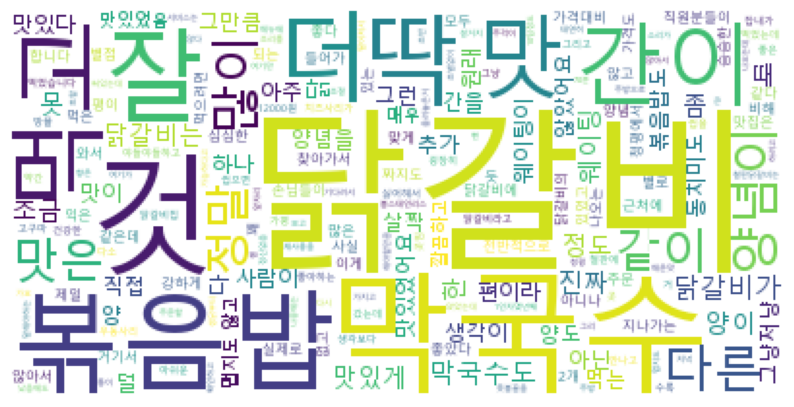

In [94]:
import string
from emoji import core #이모티콘 없애기
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font_path = '‪‪C:\Windows\Fonts\malgun.ttf'
test = []
d_K9X9Uwxw__['리뷰내용'].apply(lambda x: test.append(x))
test = " ".join(test)
test = test.translate(str.maketrans(".", " ", string.punctuation)).replace("ㅋ", " ").replace("ㅠ", " ")
core.replace_emoji(test).replace("ㅎ", " ").replace("  ", " ").strip()
# wordcloud만들기
wc = WordCloud(
    max_words = 200,
    font_path = font_path,
    background_color = 'white',
    stopwords = []).generate(test)
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
# plt.show()
plt.savefig("test.png")
# plt.close()